# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *
from skimage.filters import median,gaussian

import math
from skimage.color import rgb2gray
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
img=rgb2gray(io.imread('pout.tif'))
img_noisy1 = random_noise(img,mode='s&p')


<ipython-input-3-767e0e7a8912>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=rgb2gray(io.imread('pout.tif'))


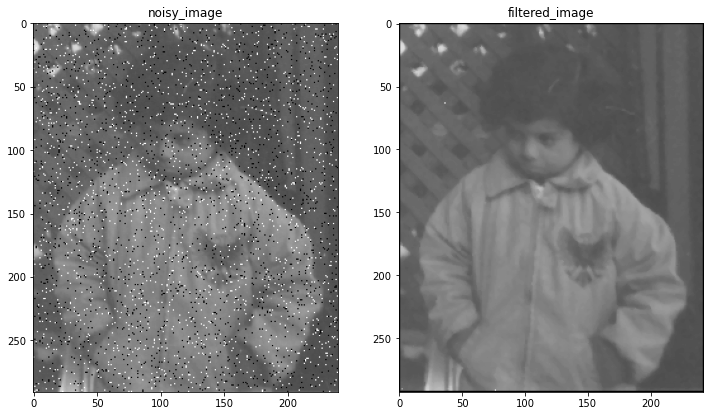

In [4]:
'''
(1) Your own median filter algorithm

'''

def medianFilter(img):
    arr = np.copy(img)
    arr = np.append([arr[0]],arr, axis=0)
    arr = np.append(arr,[arr[np.shape(arr)[0]-1]], axis=0)
    arr = np.insert(arr,0,np.transpose(arr[:,0]),axis = 1)
    arr = np.insert(arr,np.shape(arr)[1],np.transpose(arr[:,np.shape(arr)[1]-1]),axis = 1)
    m, n = arr.shape
    img_new1 = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp2 = img_noisy1[i-1:i+2,j-1:j+2]      
            img_new1[i, j]= np.median(temp2)
    return img_new1
    


show_images([img_noisy1,medianFilter(img_noisy1)],['noisy_image','filtered_image'])

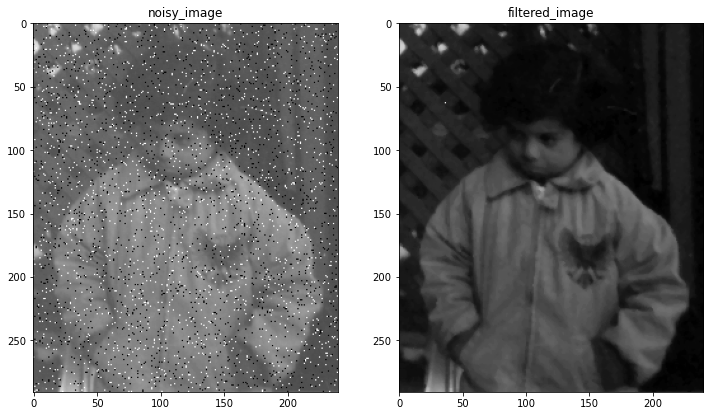

In [5]:
'''
(2) skimage median filter
'''

med = median(img_noisy1)
show_images([img_noisy1,med],['noisy_image','filtered_image'])

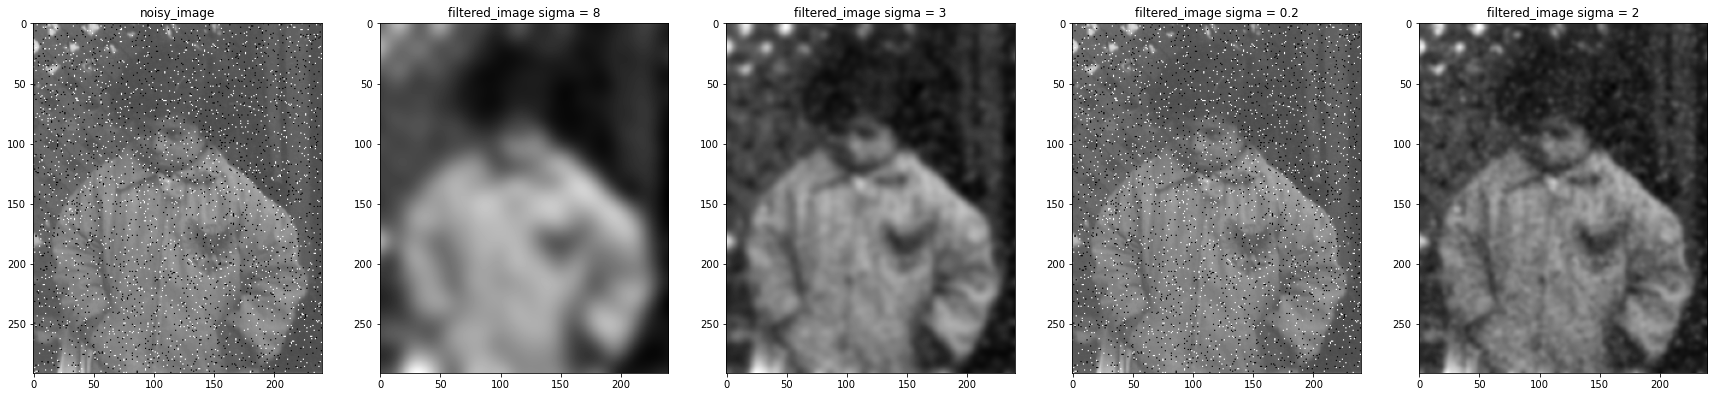

In [14]:
'''
(3) Gaussion Filters
'''
g1 = gaussian(img_noisy1, sigma=8)
g2 = gaussian(img_noisy1, sigma=3)
g3 = gaussian(img_noisy1, sigma=0.2)
g4 = gaussian(img_noisy1, sigma=2) #->khaled chosen
show_images([img_noisy1,g1,g2,g3,g4],['noisy_image','filtered_image sigma = 8','filtered_image sigma = 3','filtered_image sigma = 0.2','filtered_image sigma = 2'])